<img src="https://www.cems.uwe.ac.uk/~pa-legg/uwecyber/images/uwe.png" width=300>
<img src="https://www.cems.uwe.ac.uk/~pa-legg/uwecyber/images/uwecyber_acecse_200.jpg" width=300>

# UFCFEL-15-3 Security Data Analytics and Visualisation
# Portfolio Task 2: Malware Analysis (2021)
---

The completion of this worksheet is worth **20%** towards your portfolio assignment for the UFCFEL-15-3 Security Data Analytics and Visualisation (SDAV) module.

### Task
---

In this task, you have been given a set of data collected from 150 machines that are infected with different strands of malware. You need to develop your own classifier that is capable of classifying a new data observation as one of the three malware variants, based on the data observations provided. The data has been pre-processed so that you can train your classifier on 120 samples of data. 30 data samples are then to be used to test the performance of the classifier, to be able to report on the accuracy of your classifier. You should make use of visualisation to illustrate how your classifier is informed by your training data, and you should be able to show how the testing data compares against your classifier model. You will need to describe the analytical process you have taken using Markdown, and you will need to report your overall final accuracy for the classifier.

### Assessment and Marking
---

| Criteria | 0-39 | 40-49 | 50-59 | 60-69 | 70-84 | 85-100 |
| --- | --- | --- | --- | --- | --- | --- |
| **Developing a suitable means to define each training data cluster centroid (20%)** | No evidence of progress | A limited attempt to address this criteria | A working solution but perhaps not optimal | Good approach to the problem | Very good approach to the problem | Excellent approach to the problem |
| **Developing a suitable means to classify test data into their respective groups and calculate classifier accuracy (40%)**  | No evidence of progress | A limited attempt to address this criteria |  A working solution but perhaps not optimal | Good approach to the problem | Very good approach to the problem | Excellent approach to the problem |
| **Visualisation of cluster centroids and of group membership for test data (20%)**  | No evidence of progress | A limited attempt to address this criteria |  A working solution but perhaps not optimal | Good approach to the problem | Very good approach to the problem | Excellent approach to the problem |
| **Supporting commentary as documented using Markdown (20%)**  | No evidence of progress | A limited attempt to address this criteria | Some evidence of markdown commentary | Good approach to the problem | Very good approach to the problem | Excellent approach to the problem |

You will need to implement your final solution in the Notebook format, with Markdown annotation -  you should use this notebook file as a template for your submission. You are also expected to complete the assignment self-assessment.

Your submission should include:
- HTML export of your complete assignment in notebook format.
- Original ipynb source file of your notebook.

### Self-Assessment
---

For each criteria, please reflect on the marking rubric and indicate what grade you would expect to receive for the work that you are submitting. For your own personal development and learning, it is important to reflect on your work and to attempt to assess this careful. Do think carefully about both positive aspects of your work, as well as any limitations you may have faced.

- **Developing a suitable means to define each training data cluster centroid (20%)**: You estimate that your grade will be 100.

- **Developing a suitable means to classify test data into their respective groups and calculate classifier accuracy (40%)**  : You estimate that your grade will be 100.

- **Visualisation of cluster centroids and of group membership for test data (20%)**: You estimate that your grade will be 100.

- **Supporting commentary as documented using Markdown (20%)**: You estimate that your grade will be 100.

Please provide a minimum of two sentences to comment and reflect on your own self-assessment:
  
*I feel I have done well on this task, and I think I have met the criteria well with efficient and suitable approaches. When it came to developing a suitable means of finding the centroid, I made it as a function which I feel is a good approach given how it reduces complexity and means that code does not have to be repeated.*
  
*Similarly I feel I did a very good job of creating a classifier, as I made it into a function which may simply be passed the new virus data which will return its prediction as to what type it is. This overal approach makes the solution efficient and easy to read, as it is made in a modular way.*
  
*My visualisation if the centroids also seems good, as I was able to create a plot that clearly showed where the calculated centroids were located, which also made it visually clear it was correct.*
  
*And finally, I felt as though I described my thought processes and approaches well throughout with markup, making it clear what I am doing in each step of the task and utilising more complex functions like inserting mathematical formulas.*

In [33]:
### Here are the imports that you will require
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.utils import shuffle

def load_data():
    # the data is a standard pcap packet capture file (saved as a csv output)
    file_name = './T2_data/T2_data.csv'
    data = pd.read_csv(file_name, names=['cpu', 'mem', 'net', 'io', 'state'], index_col=False)
    pca = PCA(n_components=2)
    out = pca.fit_transform(data[['cpu', 'mem', 'net','io']])
    df = pd.DataFrame(out, columns=['pca1', 'pca2'])
    df['state'] = data['state']
    train_data = df[:120]
    test_data = df[120:]
    test_labels = test_data['state']
    test_data = test_data.drop(columns='state')
    malware = train_data['state'].unique()
    return train_data, test_data, test_labels, malware

# Here are the training and testing datasets
# split into the input data and the output labels
train_data, test_data, test_labels, malware = load_data()
#malware = train_data['state'].unique()

In [34]:
### Have a look at what the pre-loaded variables contain: train_data, test_data, test_labels, malware
print ("Malware class titles:", malware)

Malware class titles: ['NetCryptoJaCker' 'nixDestr00x0yer' 'Andr0idM0nkey']


## Ploting the Data

To better understand the data that we are working with, we can plot the 2 dimensions using a scatter plot. We can seperate our three classes by colour to identify the different clusters.

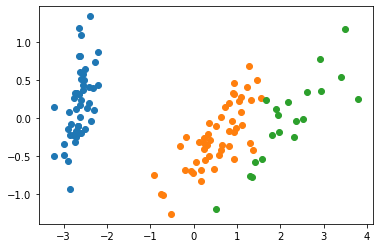

In [35]:
set1 = train_data[ train_data['state']==malware[0] ]
set2 = train_data[train_data['state']==malware[1]]
set3 = train_data[train_data['state']==malware[2]]
plt.scatter(set1['pca1'], set1['pca2'])
plt.scatter(set2['pca1'], set2['pca2'])
plt.scatter(set3['pca1'], set3['pca2'])
plt.show()

The above code loads in the dataset and splits this into 3 groups, based on the malware name given in the dataset. The three groups are plotted indepedently, each with a unique colour, so that we can begin to make comparison between these groups, and what characteristics may be used to differentiate.

Now it is over to you...

## Pre-processing
#### The data provided should first be prepared before it is worked with

The 3 training cluster dataframes do not need to specify what malware it is on each row, since the entire dataframe is dedicated to a single category of malware.
It is important however that they are not mixed up, and so the dataframes will be renamed to the malware they represent.

In [36]:
#Renaming the sets and dropping the 'state' column
NetCryptoJaCker = set1.drop(columns=['state'])
nixDestr00x0yer = set2.drop(columns=['state'])
Andr0idM0nkey = set3.drop(columns=['state'])

Now that the cluster dataframes are more appropriately named and do not contain any useless data, it would also be ideal to ensure the columns are an appropriate data type

In [37]:
#Print the data types of each column, for each of the clusters
print(NetCryptoJaCker.dtypes)
print(nixDestr00x0yer.dtypes)
print(Andr0idM0nkey.dtypes)

pca1    float64
pca2    float64
dtype: object
pca1    float64
pca2    float64
dtype: object
pca1    float64
pca2    float64
dtype: object


The dataframes have suitable data types, but it would be ideal if the columns were more appropriately named. Since the malware data has been reduced to 2 dimensions, they may be considered as points in 2D space, so it will make more sense to rename them to 'x' and 'y'.

In [38]:
#Replace 'pca1' with 'x', and 'pca2' with 'y'
NetCryptoJaCker = NetCryptoJaCker.rename(columns={'pca1': 'x', 'pca2': 'y'})
nixDestr00x0yer = nixDestr00x0yer.rename(columns={'pca1': 'x', 'pca2': 'y'})
Andr0idM0nkey = Andr0idM0nkey.rename(columns={'pca1': 'x', 'pca2': 'y'})

As a final check, we will check the contents of one to make sure the changes have been applied.

In [39]:
NetCryptoJaCker.head(6)

,x,y
0,-2.684207,0.326607
1,-2.715391,-0.169557
2,-2.889820,-0.137346
3,-2.746437,-0.311124
4,-2.728593,0.333925
5,-2.279897,0.747783


The cluster sets are now ready to work with.

# Defining the Data Center Centroids
#### Before a method can be devised for classifying malware types, the centroids for the previously established clusters must be found.
In order to accomplish this, a function will be created for finding the centroid from a series of point coordinates. The difference between the data points may be thought of as a euclidean distance between 2 points in space.
Therefor, the difference or 'distance' between the points will be calculated with the formula: $\sqrt{(x_1-x_2)^2+(y_1-y_2)^2}$ = *distance*

In [40]:
#First define a new function, with a dataframe input
def getCentroid (df):
    #Create an empty integer for summing the x and y values
    sumx = 0
    sumy = 0
    #For each coordinate
    for coord in range(len(df.index)):
        #Add x to all previous x values
        #Then add y to all previous y values
        sumx = sumx + df.iloc[coord,0]
        sumy = sumy + df.iloc[coord,1]
    #The x and y column from all data points has now been summed up
    #Now find the average position (centroid)
    x = sumx / len(df.index)
    y = sumy / len(df.index)
    #Finally return the result
    return x,y

The function may also be tested to see if it works, and if it returns a tuple as it should.

In [41]:
#Run the previously created function
getCentroid(NetCryptoJaCker)

(-2.640840758313127, 0.1905199527813719)

The function appears to be functional, and so it is ready to be used for training.

Now a dataframe should be created to store the centroid points, which will be key for creating a classifier. Using the created function, the dataframe is populated by the function from the data.

In [42]:
#Create a new dataset for containing the centroids
centroids = pd.DataFrame(columns=["x","y"],data=[
    getCentroid(NetCryptoJaCker),
    getCentroid(nixDestr00x0yer),
    getCentroid(Andr0idM0nkey)
])

It's also worth checking that the new dataframe has drawn properly, and so it will be checked.

In [43]:
centroids

,x,y
0,-2.640841,0.190520
1,0.531993,-0.244030
2,2.198211,-0.023801


The dataframe is functional and in the correct format, and so the next step will be to visualise these centroid points to ensure they appear to be correct (roughly in the center of the clusters).

# Visualising the Cluster Centroids
#### As a final check to ensure the centroids appear to be in correct positions, it will be plotted over the groups.
To achieve this, the clusters from earlier will be replotted alongside the newly created centroid dataframe as well, to see how whether they are within correct positions.

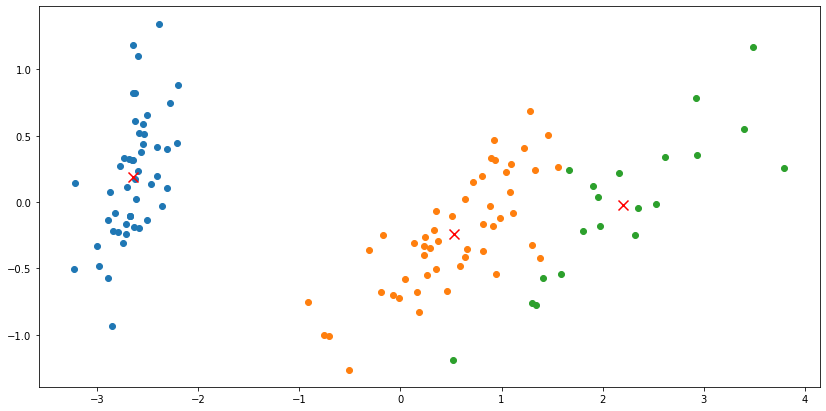

In [44]:
#Increase the plot size to make it more easily visible
plt.figure(figsize=(14,7))

#Plot the 3 malware type clusters from before
plt.scatter(NetCryptoJaCker['x'], NetCryptoJaCker['y'])
plt.scatter(nixDestr00x0yer['x'], nixDestr00x0yer['y'])
plt.scatter(Andr0idM0nkey['x'], Andr0idM0nkey['y'])

#Now plot the newly calculated centroids, with 'x' markers to be more visible
plt.scatter(centroids['x'],centroids['y'], marker="x", color='red', s=100)

plt.show()

The position of the centroids appear to be in the middle, and so the function is working correctly. This can now be used to create a method for classifying a new piece of malware that is introduced.

# Creating a Classification Method
#### Working from the centroid positions calculated, a method for classifying new malware can be devised.
This will be done by creating a function that may be passed a new malware data point, which will then return the predicted category.
Before this is done however, another function will be created to get the distance between 2 specified points as this operation will have to be repeated multiple times to classify a malware.

In [45]:
#Import the math library for using square root
import math

#Create a function for calculating the euclidean distance between 2 specified points
def getDistance(xpoint,ypoint,xcentroid,ycentroid):
    distance = math.sqrt(
        ((xpoint - xcentroid)**2)+((ypoint - ycentroid)**2)
    )
    return distance

#Now create a function for classifying malware
def classifyMalware(pointx,pointy):
    #Calculate the distance between input points and cluster centroids using the previously made function
    cat1 = getDistance(pointx,pointy,centroids['x'][0],centroids['y'][0])
    cat2 = getDistance(pointx,pointy,centroids['x'][1],centroids['y'][1])
    cat3 = getDistance(pointx,pointy,centroids['x'][2],centroids['y'][2])
    #Now store the distance values alongside their centroid category names in a dictionary
    category = {
        "NetCryptoJaCker":cat1,
        "nixDestr00x0yer":cat2,
        "Andr0idM0nkey":cat3}
    #Finally, return the name of the malware that had the minimum difference (distance)
    return min(category, key=category.get)

Now the 'classifyMalware' function may be passed any 2 coordinates of a malware in order to return a prediction.

Quickly testing with coordinate to check it works, the point (-2,0.5) will be checked.

In [46]:
classifyMalware(-2,0.5)

'NetCryptoJaCker'

The function appears functional, and returns its prediction.

Now that a classifier has been made, it is time to test its accuracy by using the separate test data set.

# Classification Method Accuracy

The approach to testing the classifier's accuracy will involve cycling through each row of the test data set, and comparing its output to the 'data_labels' set to see whether the prediction matches the correct label.
For finding the accuracy, the number of correct predictions the classifier makes will be counted which will also be used to find the percentage of accuracy.

In [47]:
#Create a new function for checking the accuracy, using a test_data and test_labels dataframe
def getAccuracy (test_data, test_labels):
    #Make a variable for tracking correct predictions
    correctPredictions = 0
    #For each malware in test dataset
    for test in range(len(test_data.index)):
        #Predict the category of malware and store it as a variable
        yhat = classifyMalware(test_data['pca1'].iloc[test],test_data['pca2'].iloc[test])
        #Check if the prediction is correct
        if yhat == test_labels.iloc[test]:
            #Predicted type was correct!
            #Add one to correct guesses
            correctPredictions=correctPredictions+1
    #Now find what percent of the test data was accurately predicted
    score = round((correctPredictions / len(test_data.index) * 100),2)
    return "The classification model correctly predicted "+str(correctPredictions)+" out of "+str(len(test_data.index))+", giving it an accuracy of "+str(score)+"%."

Now that a method has been made to check the accuracy of the classification model made, it can now be tested with the test_data and test_labels datasets.

In [48]:
getAccuracy(test_data, test_labels)

'The classification model correctly predicted 25 out of 30, giving it an accuracy of 83.33%.'

### The classifier correctly predicted 25/30 malware types, giving it an accuracy of 83.33%
There is now a fully functional classifier with a decent accuracy which may be deployed for classifying future malware.